## 1. Installing

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#metrics and split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler


## 2. Data Preperation

In [36]:
df = pd.read_csv("german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [37]:
y = df['Risk']

X = df.drop(columns=['Risk'])
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [38]:
X.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [39]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
X_train.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     149
Checking account    323
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   651 non-null    object
 5   Checking account  477 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


### Missing Values Analysis

In [42]:
#mode of Saving Accounts attribute

mode_saving_accounts = X_train['Saving accounts'].mode()
mode_saving_accounts

0    little
Name: Saving accounts, dtype: object

In [43]:
mode_saving_accounts = X_test['Saving accounts'].mode()
mode_saving_accounts

0    little
Name: Saving accounts, dtype: object

In [44]:
X_train['Saving accounts'].fillna(mode_saving_accounts[0], inplace=True)

In [45]:
X_test['Saving accounts'].fillna(mode_saving_accounts[0], inplace=True)

In [46]:
X_test['Saving accounts'].isnull().sum()

0

In [47]:
#mode of Checking Accouny
mode_checking_account = X_train['Checking account'].mode()
mode_checking_account

0      little
1    moderate
Name: Checking account, dtype: object

In [48]:
mode_checking_account = X_test['Checking account'].mode()
mode_checking_account

0    little
Name: Checking account, dtype: object

In [49]:
X_train['Checking account'].fillna(mode_checking_account[0], inplace=True)

In [50]:
X_test['Checking account'].fillna(mode_checking_account[0], inplace=True)

In [51]:
X_train['Checking account'].isnull().sum()

0

In [52]:
X_test['Checking account'].isnull().sum()

0

In [53]:
numeric_cols = ['Job','Credit amount','Duration','Housing','Saving accounts','Checking account']
categorical_cols = ['Age','Sex','Purpose']

### Label Encoding & One-Hot Encoding

In [54]:

X_train.Dummies_Sex = pd.get_dummies(X_train['Sex']).rename(columns=lambda x: 'Sex_' + str(x))
X_train.Dummies_Sex.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\1172640220.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Sex_female,Sex_male
29,False,True
535,False,True
695,False,True
557,True,False
836,True,False


In [55]:

X_test.Dummies_Sex = pd.get_dummies(X_test['Sex']).rename(columns=lambda x: 'Sex_' + str(x))
X_test.Dummies_Sex.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\4231340033.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Sex_female,Sex_male
521,True,False
737,False,True
740,False,True
660,False,True
411,False,True


In [56]:
X_train.Dummies_Housing = pd.get_dummies(X_train['Housing']).rename(columns=lambda x: 'Housing_' + str(x))
X_train.Dummies_Housing.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\752791893.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Housing_free,Housing_own,Housing_rent
29,False,True,False
535,False,False,True
695,False,False,True
557,False,True,False
836,False,True,False


In [57]:
X_test.Dummies_Housing = pd.get_dummies(X_test['Housing']).rename(columns=lambda x: 'Housing_' + str(x))
X_test.Dummies_Housing.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\3539180388.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Housing_free,Housing_own,Housing_rent
521,False,True,False
737,False,True,False
740,False,True,False
660,False,False,True
411,False,True,False


In [58]:
X_train.Dummies_Saving = pd.get_dummies(X_train['Saving accounts']).rename(columns=lambda x: 'Saving_' + str(x))
X_train.Dummies_Saving.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\2351222134.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Saving_little,Saving_moderate,Saving_quite rich,Saving_rich
29,True,False,False,False
535,True,False,False,False
695,False,False,True,False
557,True,False,False,False
836,True,False,False,False


In [59]:
X_test.Dummies_Saving = pd.get_dummies(X_test['Saving accounts']).rename(columns=lambda x: 'Saving_' + str(x))
X_test.Dummies_Saving.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\199061695.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Saving_little,Saving_moderate,Saving_quite rich,Saving_rich
521,True,False,False,False
737,False,True,False,False
740,False,True,False,False
660,True,False,False,False
411,True,False,False,False


In [60]:
X_train.Dummies_Checking = pd.get_dummies(X_train['Checking account']).rename(columns=lambda x: 'Checking_' + str(x))
X_train.Dummies_Checking.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\2547965315.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Checking_little,Checking_moderate,Checking_rich
29,True,False,False
535,False,False,True
695,True,False,False
557,True,False,False
836,True,False,False


In [61]:
X_test.Dummies_Checking = pd.get_dummies(X_test['Checking account']).rename(columns=lambda x: 'Checking_' + str(x))
X_test.Dummies_Checking.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\686243663.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Checking_little,Checking_moderate,Checking_rich
521,True,False,False
737,True,False,False
740,True,False,False
660,False,False,True
411,True,False,False


In [62]:
X_train.Dummies_Purpose = pd.get_dummies(X_train['Purpose']).rename(columns=lambda x: 'Purpose_' + str(x))
X_train.Dummies_Purpose.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\3868167137.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
29,True,False,False,False,False,False,False,False
535,False,False,False,True,False,False,False,False
695,False,True,False,False,False,False,False,False
557,False,True,False,False,False,False,False,False
836,False,False,False,False,False,True,False,False


In [63]:
X_test.Dummies_Purpose = pd.get_dummies(X_test['Purpose']).rename(columns=lambda x: 'Purpose_' + str(x))
X_test.Dummies_Purpose.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_14940\2697993097.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
521,False,False,False,False,False,True,False,False
737,False,True,False,False,False,False,False,False
740,False,True,False,False,False,False,False,False
660,False,False,False,False,False,True,False,False
411,False,True,False,False,False,False,False,False


In [64]:
interval = (18, 25, 35, 60, 120)
# cats = ['Student', 'Young', 'Adult', 'Senior']
cats = [1, 2, 3 ,4]
X_train["Age_cat"] = pd.cut(df.Age, interval, labels=cats)
X_test["Age_cat"] = pd.cut(df.Age, interval, labels=cats)



In [65]:
X_train = pd.concat([X_train,X_train.Dummies_Sex, X_train.Dummies_Housing,X_train.Dummies_Saving,X_train.Dummies_Checking, X_train.Dummies_Purpose], axis=1)
X_train.drop(columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age'], inplace=True)
X_train.head()

,Job,Credit amount,Duration,Age_cat,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving_little,...,Checking_moderate,Checking_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
29,2,6836,60,4,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
535,2,2319,21,2,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,False,False
695,2,1236,6,3,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
557,2,5003,21,2,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
836,2,886,12,1,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False


In [66]:
X_test = pd.concat([X_test,X_test.Dummies_Sex, X_test.Dummies_Housing,X_test.Dummies_Saving,X_test.Dummies_Checking, X_test.Dummies_Purpose], axis=1)
X_test.drop(columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age'], inplace=True)
X_test.head()

,Job,Credit amount,Duration,Age_cat,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving_little,...,Checking_moderate,Checking_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
521,2,3190,18,1,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
737,1,4380,18,2,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
740,2,2325,24,2,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
660,2,1297,12,1,False,True,False,False,True,True,...,False,True,False,False,False,False,False,True,False,False
411,3,7253,33,2,False,True,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False


### Correlation and Heatmap Analysis

Để thấy rằng các features là độc lập có điều kiện với nhau (ĐK áp dụng Naive Bayes)

<Axes: >

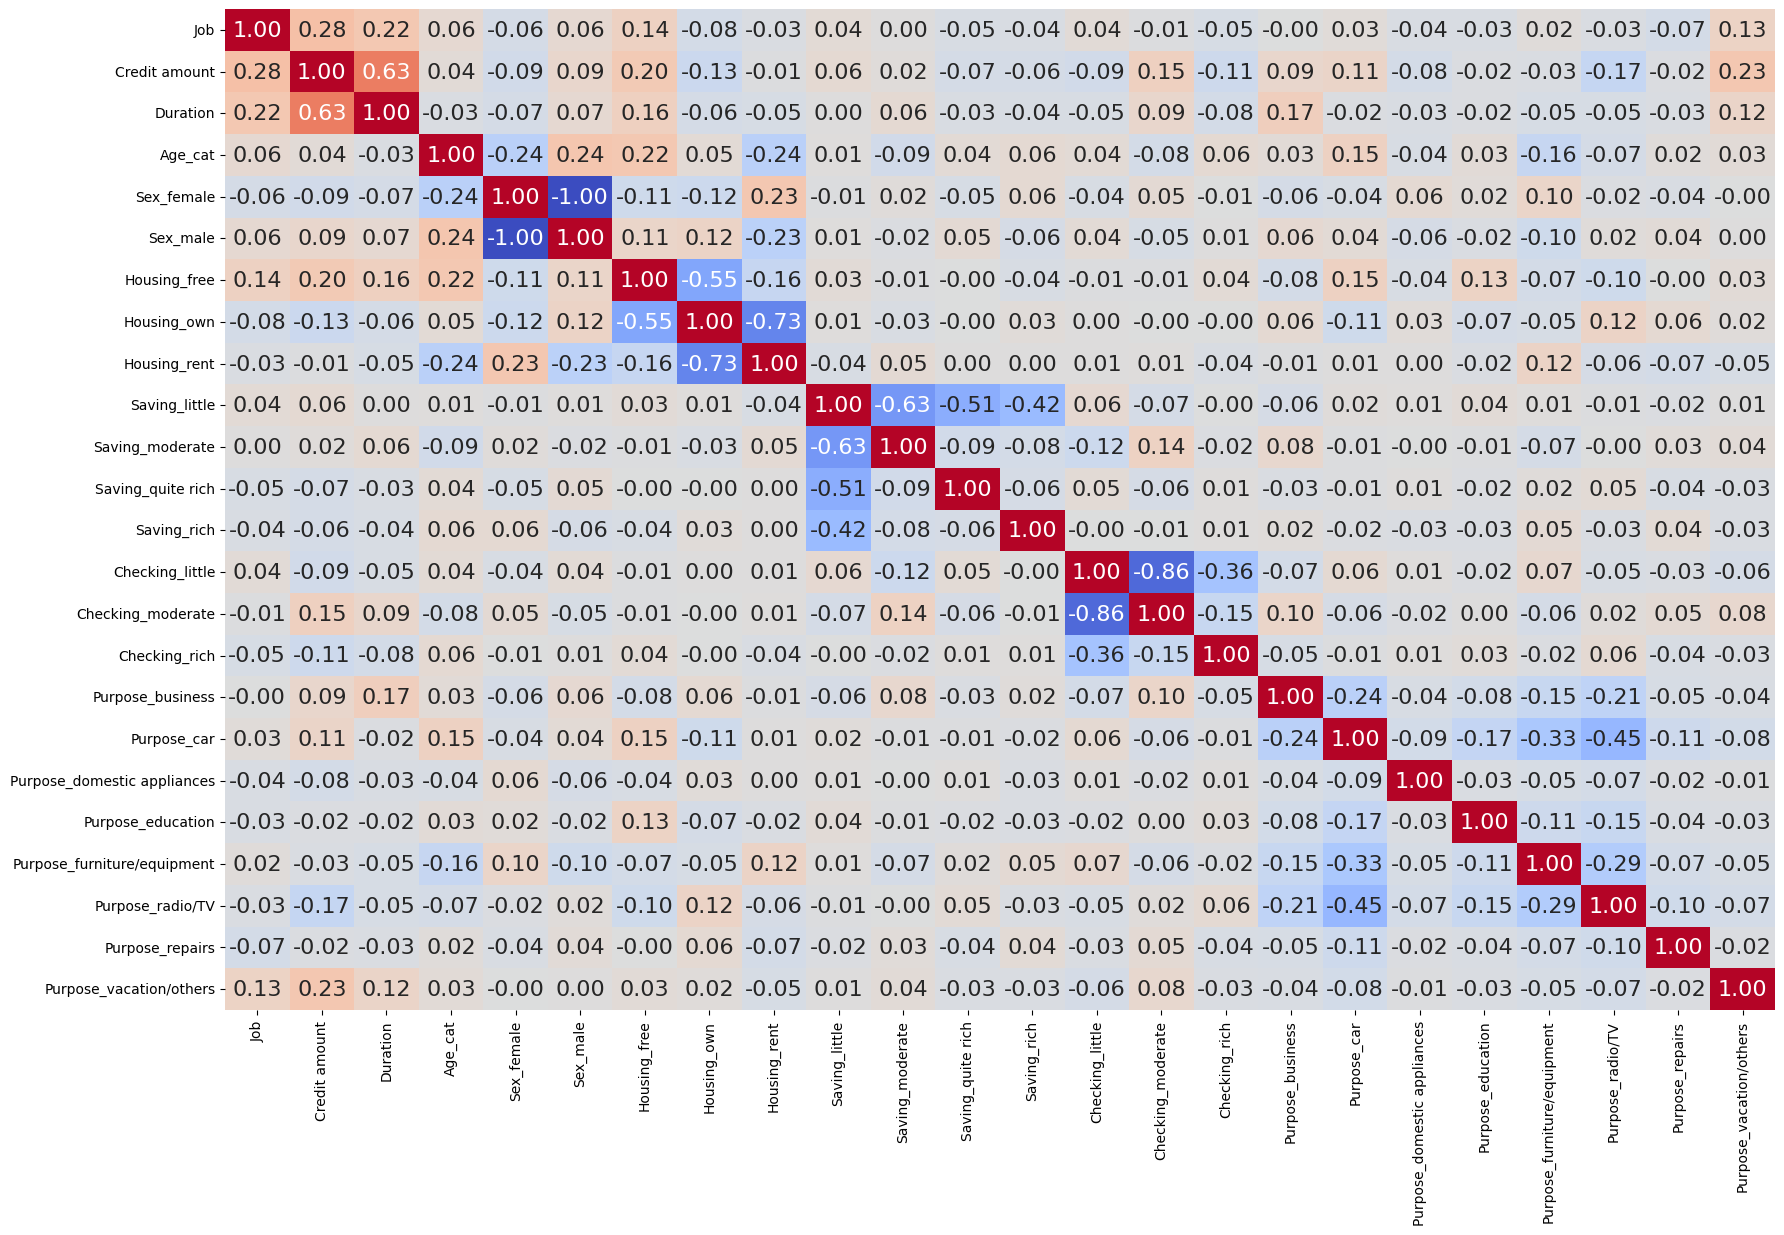

In [67]:
plt.figure(figsize=(20,13))
sns.heatmap(X_train.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

Nhận thấy mối tương quan của các feartures với nhau khá thấp -> thỏa mãn điều kiện

## 3. Modelling

In [68]:
#from imblearn.over_sampling import SMOTE
#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [69]:
#X_resampled.info()

In [70]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

print("Primitive error evaluation accuracy score: ", model.score(X_train, y_train))

y_pred = model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

Primitive error evaluation accuracy score:  0.6875
Test predict accuracy score:  0.615 

Confussion Matrix: 
 [[ 22  37]
 [ 40 101]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

         bad       0.35      0.37      0.36        59
        good       0.73      0.72      0.72       141

    accuracy                           0.61       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.62      0.61      0.62       200



Nhận xét: Bộ dữ liệu đầu vào ít (1000 mẫu) và mất cân bằng tỉ lệ giữa good và bad của Risk nên độ chính xác chưa cao và chênh lệch lớn ở kết quả good-bad của các độ đo

In [71]:
from imblearn.over_sampling import SMOTE 

X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

X_train.shape

(1118, 24)

In [72]:
model = GNB.fit(X_train, y_train)

print("Primitive error evaluation accuracy score: ", model.score(X_train, y_train))

y_pred = model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values